# Explorative Datenanalyse
Im Folgenden werden die gemessenen Index-Werte der Brokkoli analysiert. Im Vorfeld wurden diese bereits innerhalb der Voronoi-Zellen segmentiert, das heisst Es werden nur noch die Pixel gewertet, welche zum Brokkoli gehören, ohne die Erde darum zu berücksichtigen.

In [125]:
%reset

# Datenabfrage von Server-DB
import pyodbc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

class font:
    BOLD = '\033[1m'
    END = '\033[0m'
    UNDERLINE = '\033[4m'

# Liste der Daten, die berücksichtigt werden
dates = ['2019-04-18', '2019-04-25', '2019-05-01', '2019-05-09', '2019-05-16', '2019-05-24', '2019-06-04','2019-06-13']

# Angeben, ob Blacklist einbezogen wird
useBlacklist = True

# Verbindungsaufbau
server = 'deepbroccoliserver.database.windows.net'
database = 'DeepBroccoliDatabase'
username = 'ntb'
password = 'brokkoli_2019'
driver= '{SQL Server}'
cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)

# Abfrage definieren und ausführen: Alle Brokkoli mit allen dazugehörigen Messwerten 
query = '''
select dbo.broccoli.id, dbo.broccolivalues.timestamp, dbo.broccoli.lat, dbo.broccoli.long, dbo.broccolivalues.pixelCount, 
dbo.broccolivalues.maxNDVI, dbo.broccolivalues.minNDVI, dbo.broccolivalues.meanNDVI, dbo.broccolivalues.medianNDVI, 
dbo.broccolivalues.NDVI_15_QUANTILE, dbo.broccolivalues.NDVI_25_QUANTILE, dbo.broccolivalues.NDVI_75_QUANTILE, 
dbo.broccolivalues.NDVI_85_QUANTILE,
dbo.broccolivalues.maxNDRE, dbo.broccolivalues.minNDRE, dbo.broccolivalues.meanNDRE, dbo.broccolivalues.medianNDRE,
dbo.broccolivalues.NDRE_15_QUANTILE, dbo.broccolivalues.NDRE_25_QUANTILE, dbo.broccolivalues.NDRE_75_QUANTILE,
dbo.broccolivalues.NDRE_85_QUANTILE
from dbo.broccoli inner join dbo.broccolivalues on dbo.broccoli.id = dbo.broccolivalues.id'''

# Blacklist einbeziehen: Brokkoli-IDs in Blacklist werden gefiltert
if useBlacklist:
    query = query + ''' where dbo.broccoli.id not in (select broccoli_id from dbo.broccoliBlacklist)'''

SQL_Query = pd.read_sql_query(query, cnxn)
broccoli_data = pd.DataFrame(SQL_Query)
cnxn.close()

# Löschen von Datensätzen mit NaN-Werten (Ist der Fall falls pixelCount == 0)
print()
print("Anzahl Datensätze: " + str(len(broccoli_data)))

broccoli_data.dropna(inplace=True)
print("Anzahl Datensätze ohne NaN: " + str(len(broccoli_data)))
print()

# Describe: Erste Übersicht
for date in dates:    
    broccoli_data_byDate = broccoli_data[broccoli_data.timestamp == date]
    print(font.BOLD + font.UNDERLINE + date + font.END)
    display(broccoli_data_byDate.describe())
    print()

Once deleted, variables cannot be recovered. Proceed (y/[n])? y

Anzahl Datensätze: 21296
Anzahl Datensätze ohne NaN: 21246

2019-04-18


,id,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,NDVI_25_QUANTILE,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000,2642.000000
mean,1342.918244,47.217909,9.493049,37.367525,0.598528,0.424658,0.508038,0.508487,0.450955,0.468108,0.546469,0.562844,0.190204,-0.012559,0.088859,0.089048,0.038793,0.056456,0.121506,0.138695
std,776.191093,0.000402,0.000293,9.370657,0.042688,0.030709,0.037260,0.039529,0.034562,0.036483,0.041053,0.041732,0.043294,0.045976,0.026781,0.028577,0.033480,0.030795,0.029410,0.031184
min,1.000000,47.217185,9.492415,6.000000,0.309548,0.226267,0.273390,0.271562,0.235888,0.245828,0.299500,0.304524,0.065542,-0.229784,-0.030301,-0.038446,-0.117262,-0.068451,0.008623,0.033885
25%,669.250000,47.217559,9.492845,31.000000,0.571769,0.405571,0.484782,0.482990,0.429526,0.444979,0.519438,0.535846,0.159976,-0.039845,0.071983,0.072421,0.017564,0.037439,0.103328,0.118988
50%,1343.500000,47.217909,9.493053,37.000000,0.599369,0.424950,0.508914,0.509552,0.450957,0.468300,0.547400,0.563450,0.187514,-0.005768,0.092574,0.092687,0.045465,0.062791,0.122229,0.137896
75%,2015.750000,47.218258,9.493263,43.000000,0.626813,0.445230,0.533820,0.535728,0.474855,0.493811,0.573892,0.591765,0.215404,0.022265,0.106905,0.108566,0.063036,0.077676,0.140286,0.158392
max,2681.000000,47.218642,9.493662,78.000000,0.728941,0.539897,0.646206,0.663208,0.564750,0.608036,0.699201,0.705629,0.422623,0.109630,0.161575,0.177574,0.116594,0.154753,0.282104,0.288997



2019-04-25


,id,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,NDVI_25_QUANTILE,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000
mean,1342.926471,47.217909,9.493048,45.921946,0.678245,0.480352,0.581948,0.585015,0.513759,0.535678,0.629226,0.646463,0.292551,0.023965,0.168206,0.170683,0.102464,0.126851,0.212817,0.234038
std,774.830018,0.000402,0.000294,12.382390,0.054144,0.038352,0.048649,0.051377,0.044781,0.047270,0.053000,0.053275,0.063952,0.059724,0.036908,0.039590,0.040573,0.038413,0.045711,0.050162
min,1.000000,47.217185,9.492415,2.000000,0.336246,0.251945,0.286488,0.291299,0.252199,0.257432,0.305532,0.320577,0.072330,-0.232045,0.053104,0.055825,-0.117065,-0.079874,0.056741,0.062977
25%,670.750000,47.217560,9.492842,38.000000,0.648935,0.457913,0.553920,0.554199,0.487066,0.506839,0.599009,0.615659,0.249637,-0.011202,0.144353,0.145061,0.075507,0.101852,0.184000,0.202193
50%,1345.500000,47.217910,9.493052,46.000000,0.680329,0.482124,0.583414,0.586740,0.514885,0.537627,0.631229,0.649526,0.285382,0.028658,0.166056,0.169947,0.102745,0.127321,0.209270,0.229321
75%,2014.250000,47.218257,9.493262,54.000000,0.715984,0.506978,0.617066,0.621746,0.544412,0.569074,0.667455,0.683941,0.325863,0.064086,0.189014,0.193187,0.130236,0.152303,0.235908,0.258902
max,2681.000000,47.218642,9.493662,101.000000,0.810579,0.580237,0.698420,0.724812,0.619175,0.654402,0.750291,0.769226,0.574725,0.197006,0.304583,0.331391,0.230546,0.259992,0.402568,0.426826



2019-05-01


,id,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,NDVI_25_QUANTILE,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000,2656.000000
mean,1342.242470,47.217909,9.493048,125.211220,0.798120,0.560936,0.681919,0.686031,0.605900,0.632110,0.732483,0.752602,0.282893,-0.000131,0.140592,0.140937,0.086649,0.106458,0.174535,0.193867
std,775.466066,0.000402,0.000293,30.335441,0.038094,0.026206,0.032982,0.035214,0.030842,0.032762,0.035888,0.036244,0.068919,0.061153,0.033093,0.034777,0.041211,0.038409,0.035140,0.038508
min,1.000000,47.217185,9.492415,8.000000,0.449248,0.331932,0.397089,0.394286,0.357925,0.369107,0.432929,0.448160,0.094710,-0.305937,-0.035179,-0.044257,-0.146473,-0.111822,0.000673,0.039560
25%,669.750000,47.217560,9.492842,109.000000,0.781512,0.548527,0.666942,0.669443,0.591304,0.616532,0.715298,0.735704,0.232661,-0.031962,0.125629,0.125259,0.069455,0.090872,0.155904,0.171434
50%,1343.500000,47.217909,9.493052,127.000000,0.803378,0.565097,0.686260,0.689989,0.609423,0.635718,0.736858,0.757247,0.268442,0.009942,0.142383,0.143489,0.094577,0.112744,0.172109,0.188223
75%,2014.250000,47.218257,9.493262,145.000000,0.822192,0.577876,0.702359,0.707610,0.625534,0.652729,0.755507,0.775571,0.320552,0.043737,0.157401,0.158295,0.113227,0.129284,0.189106,0.210405
max,2681.000000,47.218642,9.493662,344.000000,0.885956,0.621285,0.764486,0.780028,0.690072,0.721110,0.828266,0.847945,0.634640,0.142997,0.266080,0.265132,0.213776,0.247302,0.316833,0.419278



2019-05-09


,id,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,NDVI_25_QUANTILE,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,1341.393233,47.217908,9.493048,335.578195,0.861752,0.604389,0.765795,0.783492,0.687293,0.728872,0.814052,0.826382,0.251548,-0.112493,0.092706,0.098625,0.029761,0.058258,0.132497,0.152565
std,774.916271,0.000402,0.000293,78.768102,0.023720,0.015953,0.025192,0.027394,0.027948,0.030836,0.024415,0.023837,0.060325,0.076805,0.023879,0.023963,0.035913,0.028981,0.026226,0.031008
min,1.000000,47.217185,9.492415,9.000000,0.492421,0.346558,0.406997,0.413145,0.368793,0.372383,0.416066,0.439089,-0.022196,-0.451823,-0.045651,-0.052040,-0.151167,-0.077773,-0.033425,-0.025810
25%,668.750000,47.217559,9.492842,297.000000,0.856405,0.600658,0.759769,0.777132,0.676909,0.718546,0.808647,0.821291,0.210372,-0.159875,0.078067,0.084501,0.007797,0.039739,0.116514,0.133574
50%,1342.500000,47.217908,9.493052,345.000000,0.865200,0.607135,0.770423,0.788854,0.691030,0.734142,0.818490,0.830273,0.242831,-0.106989,0.093105,0.099249,0.031791,0.060531,0.130390,0.147934
75%,2012.250000,47.218256,9.493261,384.000000,0.873070,0.611942,0.778988,0.797596,0.703612,0.746958,0.826002,0.837626,0.282495,-0.056918,0.107235,0.113669,0.055732,0.078672,0.146331,0.167769
max,2681.000000,47.218642,9.493662,1032.000000,0.910571,0.641869,0.819025,0.837019,0.756990,0.787709,0.867475,0.881187,0.572957,0.077098,0.203677,0.203830,0.123095,0.158024,0.265532,0.344594



2019-05-16


,id,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,NDVI_25_QUANTILE,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000,2652.000000
mean,1343.384992,47.217909,9.493049,450.262066,0.884741,0.620232,0.770183,0.777562,0.698531,0.730552,0.817994,0.836430,0.384324,-0.020110,0.200051,0.202229,0.135992,0.161150,0.241843,0.264440
std,775.104134,0.000402,0.000293,108.382060,0.024488,0.015937,0.024451,0.026033,0.026740,0.027285,0.025902,0.025396,0.092492,0.094252,0.034000,0.032921,0.039620,0.035249,0.038671,0.046165
min,1.000000,47.217185,9.492415,9.000000,0.601460,0.448223,0.528651,0.539510,0.465971,0.496593,0.540294,0.566369,0.125278,-0.478812,0.045758,0.046193,-0.060572,-0.027874,0.096930,0.120490
25%,671.750000,47.217560,9.492843,394.000000,0.876497,0.613113,0.760711,0.766645,0.686137,0.718248,0.806797,0.826393,0.314357,-0.071297,0.178701,0.182745,0.113882,0.141617,0.217651,0.235311
50%,1345.500000,47.217910,9.493052,464.000000,0.888338,0.622183,0.773824,0.781017,0.701945,0.734429,0.821452,0.840077,0.362601,-0.004431,0.198684,0.202329,0.140531,0.163797,0.236806,0.255631
75%,2014.250000,47.218257,9.493262,524.000000,0.898872,0.629337,0.785060,0.793758,0.715396,0.747661,0.833697,0.851480,0.436884,0.048791,0.220442,0.222804,0.163886,0.184950,0.262488,0.287037
max,2681.000000,47.218642,9.493662,728.000000,0.936661,0.669158,0.822826,0.838612,0.763206,0.791581,0.879668,0.891404,0.774605,0.155240,0.405552,0.422640,0.229620,0.258156,0.583429,0.629100



2019-05-24


,id,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,NDVI_25_QUANTILE,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000,2660.000000
mean,1341.995113,47.217908,9.493048,987.689098,0.913321,0.639217,0.794788,0.802615,0.723507,0.753731,0.843271,0.860968,0.462634,-0.007593,0.258292,0.261752,0.192172,0.218173,0.302630,0.324647
std,775.248177,0.000402,0.000293,218.297469,0.024293,0.017526,0.033303,0.038689,0.034606,0.038004,0.034541,0.032030,0.163010,0.115213,0.134255,0.136210,0.128103,0.131576,0.140390,0.143411
min,1.000000,47.217185,9.492415,10.000000,0.751347,0.528105,0.620162,0.607506,0.546851,0.565661,0.674685,0.711386,0.135930,-0.465496,-0.088654,-0.105472,-0.172560,-0.149981,-0.041195,0.000913
25%,668.750000,47.217559,9.492842,868.000000,0.900424,0.629193,0.774848,0.778759,0.702191,0.730683,0.822223,0.841989,0.333459,-0.082393,0.160569,0.163171,0.100531,0.124256,0.201197,0.220576
50%,1343.500000,47.217909,9.493052,989.000000,0.916238,0.640255,0.798911,0.805407,0.725854,0.757853,0.847178,0.865419,0.412156,-0.007764,0.227480,0.229620,0.169623,0.191085,0.266558,0.285432
75%,2013.250000,47.218256,9.493261,1110.250000,0.929108,0.649939,0.816171,0.827523,0.746275,0.779268,0.865165,0.881110,0.580164,0.068559,0.321137,0.325331,0.252601,0.277621,0.368983,0.393906
max,2681.000000,47.218642,9.493662,2325.000000,0.981058,0.757975,0.913307,0.928941,0.866713,0.893589,0.949230,0.957152,0.885469,0.425145,0.659116,0.665100,0.595982,0.624422,0.717508,0.744636



2019-06-04


,id,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,NDVI_25_QUANTILE,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000
mean,1341.478963,47.217908,9.493048,1146.194591,0.888410,0.626723,0.785580,0.792303,0.731593,0.755626,0.822473,0.837058,0.345510,-0.178785,0.111254,0.117022,0.021689,0.058016,0.170087,0.198212
std,775.221842,0.000402,0.000293,167.553765,0.022155,0.021000,0.026232,0.026446,0.032842,0.030395,0.024307,0.023734,0.068588,0.079484,0.059024,0.060337,0.065398,0.063766,0.058358,0.057797
min,1.000000,47.217185,9.492415,38.000000,0.708941,0.541214,0.598737,0.597490,0.551159,0.564481,0.610636,0.628195,0.077391,-0.521817,-0.087258,-0.112664,-0.209394,-0.154137,-0.044954,-0.021634
25%,668.250000,47.217559,9.492841,1071.000000,0.875954,0.613990,0.769592,0.775887,0.709698,0.735542,0.808507,0.823958,0.301293,-0.225936,0.070858,0.075383,-0.022569,0.014010,0.129417,0.159012
50%,1342.500000,47.217908,9.493052,1151.500000,0.891781,0.627567,0.788453,0.795598,0.733169,0.757973,0.826407,0.840788,0.343318,-0.170652,0.116391,0.123171,0.024178,0.062924,0.176461,0.203681
75%,2012.750000,47.218256,9.493261,1222.000000,0.904213,0.636840,0.804678,0.811689,0.755351,0.777968,0.840146,0.854031,0.388265,-0.124088,0.154870,0.161537,0.067950,0.104934,0.213663,0.240996
max,2681.000000,47.218642,9.493662,2274.000000,0.944795,0.732271,0.843377,0.852972,0.813181,0.826296,0.882042,0.899964,0.570194,0.047755,0.254154,0.265581,0.193233,0.215394,0.310905,0.346955



2019-06-13


,id,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,NDVI_25_QUANTILE,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000,2662.000000
mean,1341.478963,47.217908,9.493048,1456.525920,0.932926,0.708877,0.854139,0.858600,0.808326,0.826369,0.887072,0.899477,0.489315,0.021689,0.283194,0.286764,0.198163,0.228718,0.340953,0.367054
std,775.221842,0.000402,0.000293,190.341065,0.012476,0.034957,0.018113,0.018525,0.021802,0.020242,0.017508,0.016700,0.055084,0.108990,0.045950,0.047225,0.052806,0.050449,0.044893,0.044321
min,1.000000,47.217185,9.492415,81.000000,0.682991,0.529922,0.605577,0.611256,0.562148,0.577701,0.631479,0.640784,0.247273,-0.453599,0.083418,0.105859,-0.089417,0.003100,0.148243,0.160145
25%,668.250000,47.217559,9.492841,1365.000000,0.928208,0.683505,0.846948,0.851107,0.799484,0.818167,0.879566,0.892238,0.452439,-0.032084,0.253880,0.255685,0.160306,0.192446,0.313525,0.340556
50%,1342.500000,47.217908,9.493052,1437.000000,0.934402,0.712352,0.856238,0.860354,0.811122,0.828636,0.888667,0.900918,0.486959,0.039066,0.281273,0.285849,0.195227,0.226869,0.340213,0.366997
75%,2012.750000,47.218256,9.493261,1514.750000,0.939810,0.733920,0.864697,0.869096,0.821171,0.838199,0.897230,0.909062,0.525498,0.095162,0.313573,0.318551,0.235058,0.264919,0.370970,0.396645
max,2681.000000,47.218642,9.493662,3058.000000,0.956885,0.806188,0.896153,0.904995,0.860916,0.872889,0.926101,0.933852,0.725093,0.235499,0.401273,0.412744,0.338219,0.355898,0.463674,0.492195


## Analyse der Pixel-Menge (pixelCount)
Als erstes werden die Anzahl Pixel, die nach der Segmentierung eine Brokkoli-Pflanze darstellen, analysiert. Hier wird versucht, inkorrekt oders seltsam segmentierte Daten zu finden.

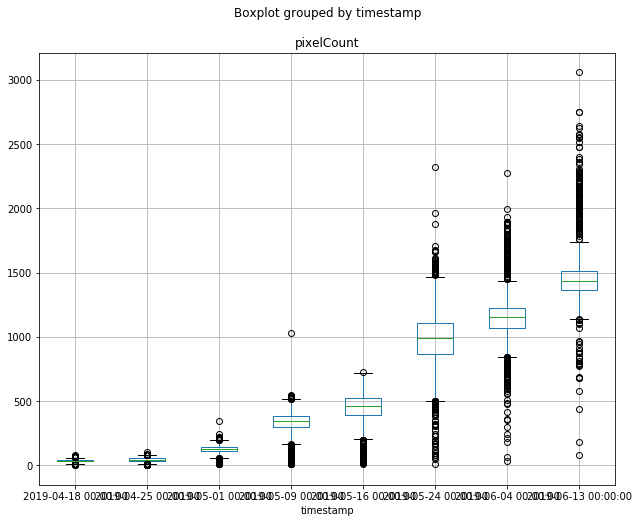

In [126]:
# Boxplot der Pixelanzahl gruppiert nach Datum
broccoli_data.boxplot(by="timestamp", column=['pixelCount'], figsize=(10,8))

In [127]:
# Analyse pixelCount: Datensätze in Bereich ausserhalb bestimmter Quantile analysieren
# Erstellung von CSV und HTML Export zur manuellen Analyse und Erstellung eine Blacklist mit inkorrekt segmentierten Datensätzen

pixelCountNotable = pd.DataFrame()
for date in dates:    
    # Listen mit Pflanzen mit pixelCount > [quantile_Lower]-Quantil bzw. < [quantile_Upper]-Quantil erstellen
    broccoli_data_byDate = broccoli_data[broccoli_data.timestamp == date]
    
    quantile_Lower = 0.03
    quantile_Upper = 0.97
    
    underLowerQuant = broccoli_data_byDate[broccoli_data_byDate.pixelCount < 
                                        broccoli_data_byDate['pixelCount'].quantile(quantile_Lower)][['id', 'pixelCount']]
    overUpperQuant = broccoli_data_byDate[broccoli_data_byDate.pixelCount > 
                                       broccoli_data_byDate['pixelCount'].quantile(quantile_Upper)][['id', 'pixelCount']]
    
    # Liste aller gefilterter IDs nach Datum erstellen
    underLowerQuant[date + "_Under"] = 1
    overUpperQuant[date + "_Over"] = 1
    underLowerQuant.set_index('id', inplace=True)
    overUpperQuant.set_index('id', inplace=True)
    pixelCountNotable = pd.concat([pixelCountNotable, underLowerQuant[date + "_Under"]], axis=1)
    pixelCountNotable = pd.concat([pixelCountNotable, overUpperQuant[date + "_Over"]], axis=1)    
    underLowerQuant.drop([date + "_Under"], axis=1, inplace=True)
    overUpperQuant.drop([date + "_Over"], axis=1, inplace=True)
    underLowerQuant.reset_index(inplace=True)
    overUpperQuant.reset_index(inplace=True)
    
    # CSV mit IDs der Pflanzen mit pixelCount < [quantile_Lower]-Quantil oder > [quantile_Upper]-Quantil erstellen
    underLowerQuant['toBlacklist']= 0
    overUpperQuant['toBlacklist']= 0
    np.savetxt("pixelCount_notableIDs_" + date + ".csv", pd.concat([underLowerQuant, overUpperQuant]), 
               header="id;pixelCount;toBlacklist", delimiter=";", fmt="%d", comments='')    
    
    # HTML mit den Segmentierungs-Bildern erstellen
    strHtml = ""
    for index, row in pd.concat([underLowerQuant, overUpperQuant]).iterrows():
        strId = str(row["id"])
        strHtml += "<p>#" + strId + " ; pixelCount = " + str(row["pixelCount"]) + "</p>\n"
        strHtml += "<img src=\"\\\\fs004\\ice\\Lehre\\Bachelorarbeiten\\2019\\Pflanzen\\Drohnenaufnahmen\\" \
        + (str(date)).replace('-', '') + "\\report\\images\\" + strId + "\\ndvi_ndre_cutout_comparision_" + strId + ".png\">\n"
       
    
    html = open("pixelCount_NotableImages_" + date + ".html", 'w')
    html.write(strHtml)
    html.close()
    
    # Ausgabe der Anzahlen
    nofUnderLowerQuant = len(underLowerQuant)
    nofOverUpperQuant = len(overUpperQuant)
    
    print(date + ":: <" + str(quantile_Lower*100) + "%; " + str(nofUnderLowerQuant) + " | >" + str(quantile_Upper*100) + "%; "
          + str(nofOverUpperQuant))
    
# Ausgabe Liste aller gefilterter IDs nach Datum
pixelCountNotable.fillna(value=0, inplace=True)
pixelCountNotable.to_csv("pixelCount_Notable_PerDate.csv", sep=';')

2019-04-18:: <3.0%; 68 | >97.0%; 75
2019-04-25:: <3.0%; 73 | >97.0%; 78
2019-05-01:: <3.0%; 79 | >97.0%; 71
2019-05-09:: <3.0%; 80 | >97.0%; 79
2019-05-16:: <3.0%; 80 | >97.0%; 79
2019-05-24:: <3.0%; 80 | >97.0%; 79
2019-06-04:: <3.0%; 79 | >97.0%; 80
2019-06-13:: <3.0%; 77 | >97.0%; 80


### Zwischenfazit pixelCount, Stand 21.05.2019
Da im Boxplot ersichtlich ist, dass es einige Ausreisser gibt, werden die Datensätze mit pixelCount ausserhalb der 2%- bzw. 98%-Quantile genauer untersucht (Muss allenfalls auf z.B. 5%, 95% ausgeweitet werden). Dazu werden je Datum eine CSV- und eine HTML-Datei erstellt, mit den IDs, dem pixelCount und den Vergleichsbildern der Segmentierung (im HTML). Diese müssen manuell kontrolliert werden, danach können Datensätze entweder gelöscht oder angepasst werden.
Im Vergleich zu den alten Daten (nicht mehr ersichtlich da überschrieben), gibt es aber vorallem nach oben, über der 75%-Quantils-Grenze, weniger krasse Ausreisser.

## Analyse der NDVI und NDRE Messwerte
Im Folgenden werden die aggregierten NDVI und NDRE Werte der segmentierten Bilder analysiert. Es werden Ausreisser und auffällige Messwerte gesucht, zeitliche Verläufe der Werte, und Abhängigkeiten zwischen den Indizes. Ein Plot mit y-Achse = NDRE und x-Achse = NDVI würde die Grundlage für die Berechnung des CCCI bilden.

## NDVI

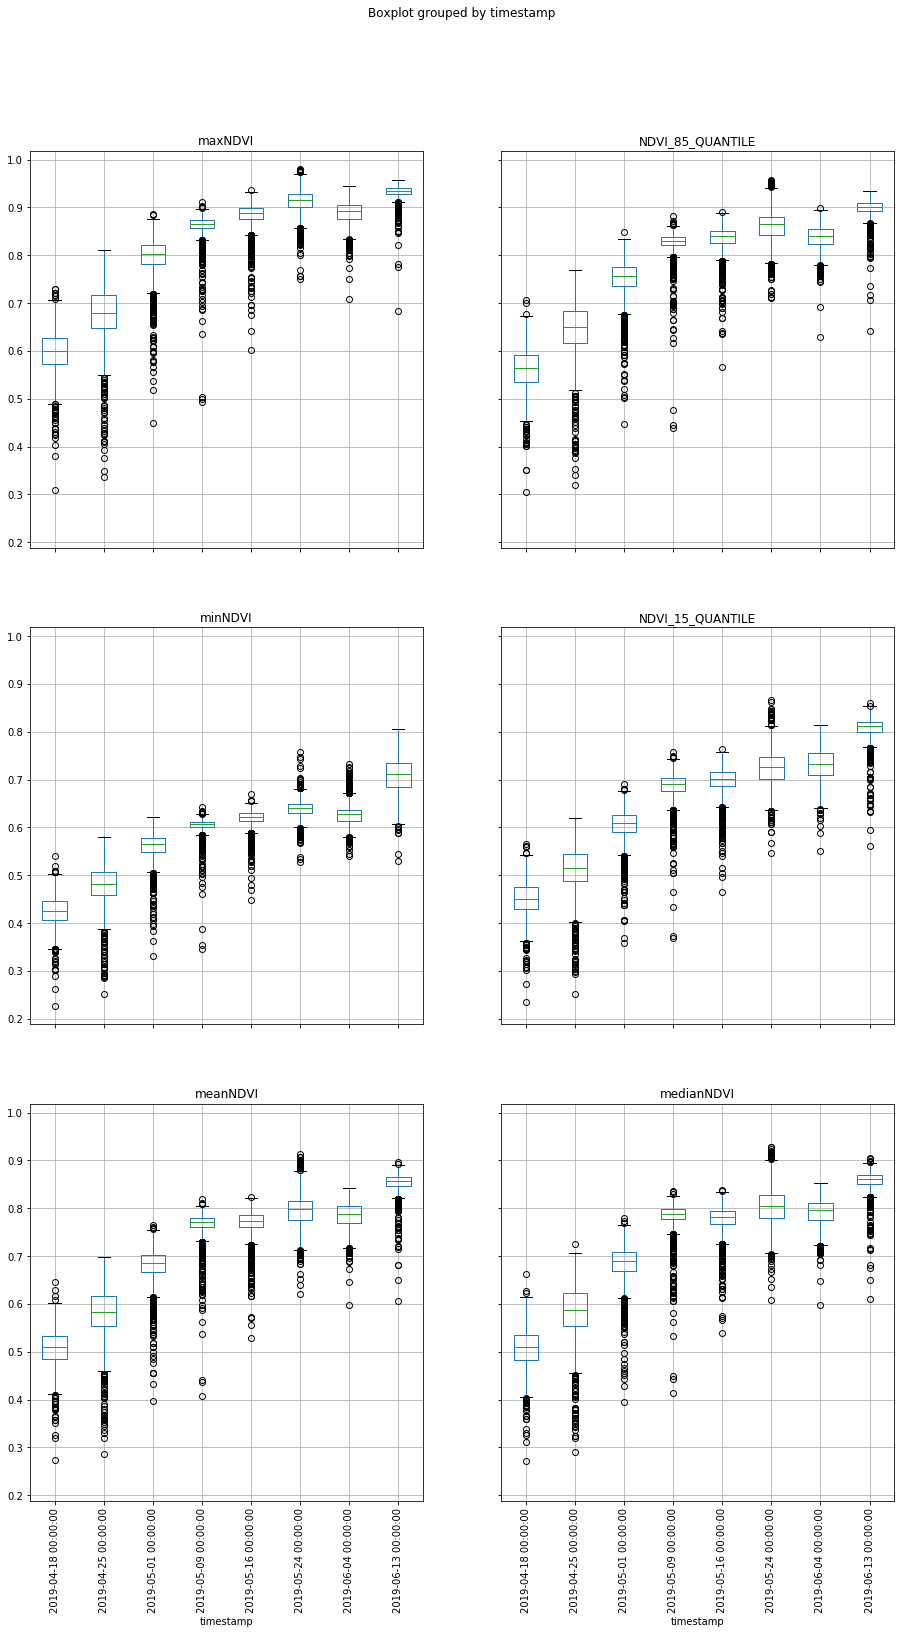

In [128]:
# Boxplot der NDVI-Werte gruppiert nach Datum
columns = ['maxNDVI', 'NDVI_85_QUANTILE', 'minNDVI', 'NDVI_15_QUANTILE', 'meanNDVI', 'medianNDVI']
ax = broccoli_data.boxplot(by="timestamp", column=columns, layout=(3,2), figsize=(15,25), rot=90)

### Zwischenfazit NDVI, Stand 21.05.2019
Es ist ersichtlich, dass die NDVI-Werte mit der Zeit im Mittel tendenziell steigen.
Statt der Max-/Min-Werte sollten eher die 15%-/85%-Quantile verwenedet werden, um Ausreisser zu vermeiden. Es ist jedoch ersichtlich, dass diese ähnlich oder fast stärker streuen als die Max-/Min-Werte. 

## NDRE

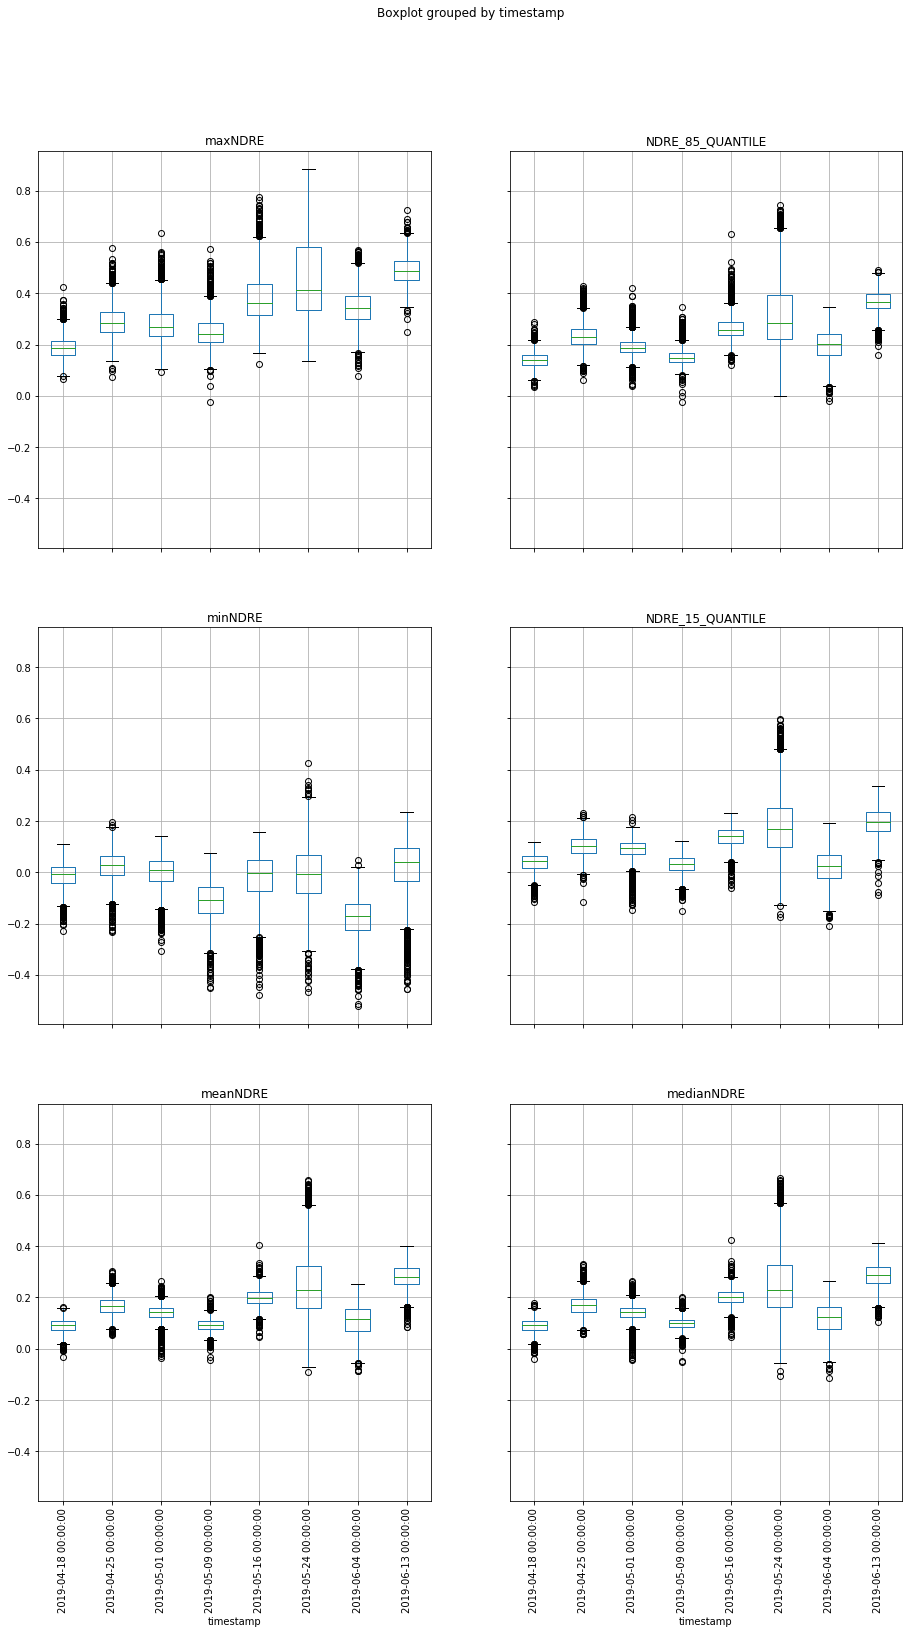

In [129]:
# Boxplot der NDRE-Werte gruppiert nach Datum
columns = ['maxNDRE', 'NDRE_85_QUANTILE', 'minNDRE', 'NDRE_15_QUANTILE', 'meanNDRE', 'medianNDRE']
ax = broccoli_data.boxplot(by="timestamp", column=columns, layout=(3,2), figsize=(15,25), rot=90)

### Zwischenfazit NDRE, Stand 21.05.2019
Bei dem NDRE-Messwerten ist ersichtlich, dass die Streuung um den Mittelwert bei den 15%-/85%-Quantilen kleiner ist als bei den Min-/Max-Werten. zudem steigen die NDRE Messwerte nicht kontinuierlich, sondern fallen und steigen wieder. Dass die unteren und oberen Werten ähnlich fallen und steigen, lässt auf eine gewisse Konsistenz in der Datenerfassung schliessen.

## Plot NDVI/NDRE
Für die allfällige Berechnung des CCCI ist ein Scatterplot mit x-Achse = NDVI und y-Achse = NDRE die Voraussetzung. Im Folgenden wird dieser mit den 85%-Quantilen und mit den Mittelwerten der Datensätze erstellt.

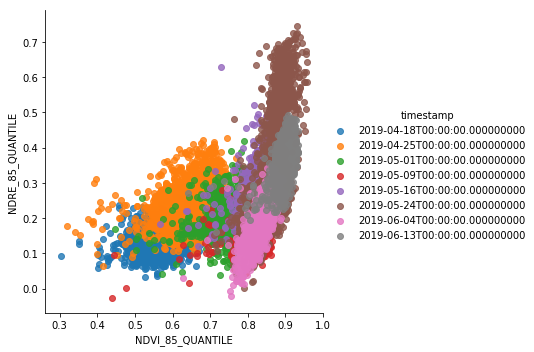

In [130]:
import seaborn as sns 
sns.lmplot(x='NDVI_85_QUANTILE', y='NDRE_85_QUANTILE', data=broccoli_data, hue='timestamp', fit_reg=False)
plt.show()

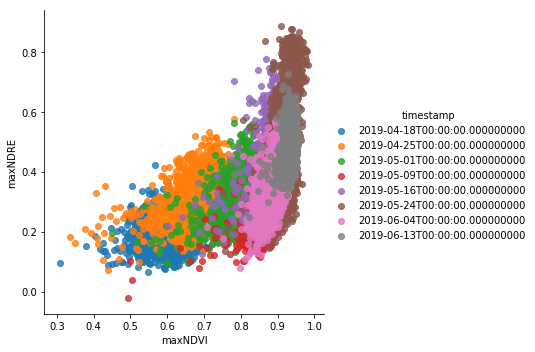

In [131]:
sns.lmplot(x='maxNDVI', y='maxNDRE', data=broccoli_data, hue='timestamp', fit_reg=False)
plt.show()

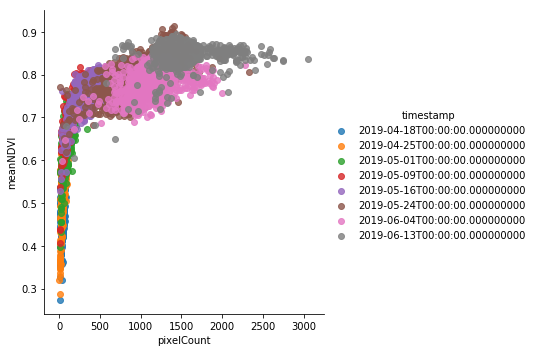

In [132]:
sns.lmplot(x='pixelCount', y='meanNDVI', data=broccoli_data, hue='timestamp', fit_reg=False)
plt.show()

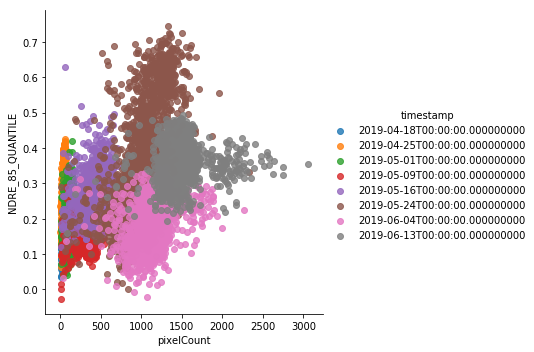

In [133]:
sns.lmplot(x='pixelCount', y='NDRE_85_QUANTILE', data=broccoli_data, hue='timestamp', fit_reg=False)
plt.show()

### Zwischenfazit NDVI/NDRE, Stand 21.05.2019
Wie in den Scatterplots ersichtlich ist, sind die Datenwolken nach Datum einigermassen örtlich gruppiert. Dabei treten jedoch sehr verschiedene NDRE-Werte pro Datum und auch NDVI-Wert auf. Eine lineare Beziehung NDVI->NDRE, wie sie in der Literatur (vergleiche Fachmodul) gezeigt wurde, ist nicht wirklich sichtbar. Die Berechnung des CCCI anhand dieser Daten ist momentan noch nicht vielversprechend, könnte jedoch gewagt werden. Abzuwarten ist, ob die NDRE-Werte mit der Zeit noch ansteigen, da sie mittlerweile eher tiefe Werte annehmen.

## Meteomatics Daten

In [134]:
# Abfrage definieren und ausführen: Alle Meteomatics-Daten
cnxn = pyodbc.connect('DRIVER='+driver+';SERVER='+server+';PORT=1433;DATABASE='+database+';UID='+username+';PWD='+ password)
SQL_Query = pd.read_sql_query('SELECT * FROM dbo.meteomatics', cnxn)
meteomatics_data = pd.DataFrame(SQL_Query)
cnxn.close()

meteomatics_data.head()

,timestamp,temperature,relativeHumidity,absoluteHumidity,dewPoint,wind,cloudCover,precipitation,precipitationType,precipitationProbability,hail,evaporation,frostDepth,radiation,accumulatedEnergy,evapotranspiration,growingDegreeDays,leafWetness
0,2019-04-08 09:00:00.243,7.4,93.800003,7.5,6.5,1.5,100.000000,0.10,0.0,5.7,0.0,-0.04,0.0,337.299988,59040.500000,0.04,NaN,1.0
1,2019-04-08 07:56:07.257,7.0,93.900002,7.3,6.1,0.4,99.000000,0.04,0.0,1.0,0.0,-0.01,0.0,126.000000,40193.898438,0.00,NaN,1.0
2,2019-04-08 07:56:37.323,7.0,93.900002,7.3,6.1,0.4,99.000000,0.04,0.0,1.0,0.0,-0.01,0.0,126.000000,40193.898438,0.00,NaN,1.0
3,2019-04-08 10:00:00.207,7.8,94.199997,7.7,7.0,0.8,100.000000,0.03,0.0,1.0,0.0,-0.09,0.0,529.599976,19428.500000,0.06,NaN,1.0
4,2019-04-08 14:00:00.203,11.2,68.800003,7.0,5.7,1.6,97.599998,0.00,0.0,1.0,0.0,-0.17,0.0,848.700012,856912.625000,0.25,0.0,0.0


In [135]:
# Aggregieren der Meteomatics-Daten zwischen den Messzeitpunkten
i = 0
meteomatics_aggregates = pd.DataFrame()
while i < (len(dates) - 1):
    weekly_data = meteomatics_data[((meteomatics_data.timestamp > dates[i]) & (meteomatics_data.timestamp < dates[i+1]))][['temperature', 'precipitation', 'radiation', 'relativeHumidity', 'wind', 'cloudCover']]
    weekly_data_agg = pd.DataFrame(weekly_data.agg(['mean']))
    weekly_data_agg['dateFrom'] = dates[i]
    weekly_data_agg['dateTo'] = dates[i+1]
    weekly_data_agg['index'] = i
    weekly_data_agg.set_index(['index'], inplace=True)
    meteomatics_aggregates = pd.concat([meteomatics_aggregates, weekly_data_agg], axis=0)
    
    i = i + 1
    
display(meteomatics_aggregates)

,temperature,precipitation,radiation,relativeHumidity,wind,cloudCover,dateFrom,dateTo
index,,,,,,,,
0,15.263095,0.006429,305.483928,46.720833,5.640476,23.620238,2019-04-18,2019-04-25
1,9.009722,0.193681,320.585417,75.047222,3.323611,84.314583,2019-04-25,2019-05-01
2,8.699476,0.117068,336.826703,72.542408,2.657068,68.918325,2019-05-01,2019-05-09
3,9.201190,0.157500,348.977976,72.144048,4.416667,61.736310,2019-05-09,2019-05-16
4,11.502604,0.323594,360.567709,81.632813,2.378125,75.412500,2019-05-16,2019-05-24
5,15.044867,0.064183,370.204183,75.316350,1.838783,54.486692,2019-05-24,2019-06-04
6,16.870233,0.341620,379.955093,72.488372,2.853488,58.016279,2019-06-04,2019-06-13


In [136]:
broccoli_data_aggregates = pd.DataFrame()
for date in dates:    
    broccoli_data_byDate = broccoli_data[broccoli_data.timestamp == date][['meanNDVI', 'pixelCount']]
    broccoli_data_byDate_agg = pd.DataFrame(broccoli_data_byDate.agg(['mean']))
    broccoli_data_byDate_agg['date'] = date
    #weekly_data_agg.set_index(['index'], inplace=True)
    broccoli_data_aggregates = pd.concat([broccoli_data_aggregates, broccoli_data_byDate_agg], axis=0)
    
display(broccoli_data_aggregates)

,meanNDVI,pixelCount,date
mean,0.508038,37.367525,2019-04-18
mean,0.581948,45.921946,2019-04-25
mean,0.681919,125.211220,2019-05-01
mean,0.765795,335.578195,2019-05-09
mean,0.770183,450.262066,2019-05-16
mean,0.794788,987.689098,2019-05-24
mean,0.785580,1146.194591,2019-06-04
mean,0.854139,1456.525920,2019-06-13


array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000152BDD5BE80>,
      dtype=object)

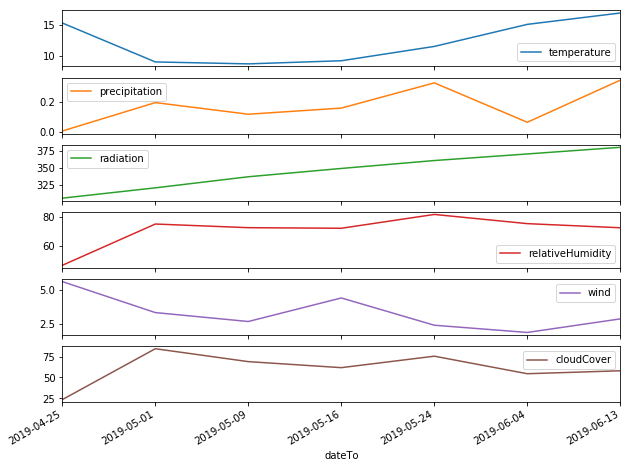

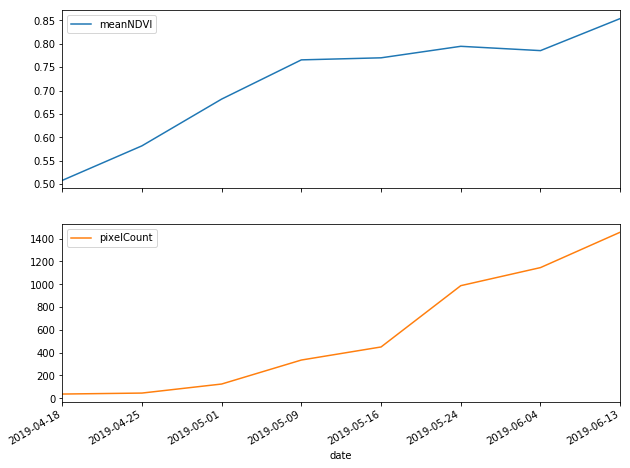

In [137]:
#plt.plot(broccoli_data_aggregates['date'],broccoli_data_aggregates[['meanNDVI']])
#plt.plot(meteomatics_aggregates['dateTo'],meteomatics_aggregates[['temperature', 'relativeHumidity','precipitation']])
#plt.show

meteomatics_aggregates.plot.line(x='dateTo', subplots=True, figsize=(10,8))
broccoli_data_aggregates.plot.line(x='date', subplots=True, figsize=(10,8))

In [138]:
meteomatics_data['timestamp'] = pd.to_datetime(meteomatics_data['timestamp'])
meteomatics_data.set_index("timestamp", drop=True, inplace=True)
tmp_weather = meteomatics_data.resample('D').median()
tmp_weather_sum = meteomatics_data.resample('D').sum()
tmp_weather['precipitation'] = tmp_weather_sum['precipitation']
tmp_weather['accumulatedEnergy'] = tmp_weather_sum['accumulatedEnergy']
tmp_weather.head()

,temperature,relativeHumidity,absoluteHumidity,dewPoint,wind,cloudCover,precipitation,precipitationType,precipitationProbability,hail,evaporation,frostDepth,radiation,accumulatedEnergy,evapotranspiration,growingDegreeDays,leafWetness
timestamp,,,,,,,,,,,,,,,,,
2019-04-08,9.65,75.300003,7.25,6.05,1.00,99.0,0.27,0.0,1.0,0.0,-0.040,0.0,316.199997,3.387132e+06,0.05,0.0,0.5
2019-04-09,8.75,88.899998,7.90,7.35,0.90,100.0,0.23,0.0,1.0,0.0,0.000,0.0,56.949998,2.691775e+06,0.01,0.0,1.0
2019-04-10,8.60,96.599998,8.30,8.05,1.25,100.0,0.44,0.0,1.0,0.0,0.000,0.0,60.000000,5.213829e+05,0.01,0.0,1.0
2019-04-11,8.45,82.149998,7.05,5.80,2.55,100.0,0.02,0.0,1.0,0.0,-0.015,0.0,62.999999,7.568380e+04,0.03,NaN,0.0
2019-04-12,6.30,85.500000,6.40,4.15,1.15,100.0,0.00,0.0,1.0,0.0,-0.010,0.0,66.050000,2.076025e+06,0.01,NaN,0.5


In [139]:
broccoli_data['timestamp'] = pd.to_datetime(broccoli_data['timestamp'])
broccoli_data.set_index("timestamp", drop=True, inplace=True)
tmp_broccoli = broccoli_data.resample('D').median()
tmp_broccoli.head()

,id,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,NDVI_25_QUANTILE,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
timestamp,,,,,,,,,,,,,,,,,,,,
2019-04-18,1343.5,47.217909,9.493053,37.0,0.599369,0.42495,0.508914,0.509552,0.450957,0.4683,0.5474,0.56345,0.187514,-0.005768,0.092574,0.092687,0.045465,0.062791,0.122229,0.137896
2019-04-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [140]:
tmp_broccoli.describe()

,id,lat,long,pixelCount,maxNDVI,minNDVI,meanNDVI,medianNDVI,NDVI_15_QUANTILE,NDVI_25_QUANTILE,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
count,8.000000,8.000000e+00,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,1343.625000,4.721791e+01,9.493052e+00,574.562500,0.822379,0.585208,0.720805,0.727189,0.654798,0.681835,0.764710,0.780962,0.323651,-0.027242,0.164743,0.168293,0.100517,0.126008,0.206755,0.226889
std,1.246423,7.959799e-07,6.772581e-07,545.370217,0.121086,0.092235,0.119079,0.121718,0.120919,0.123721,0.118262,0.117216,0.097089,0.072890,0.067451,0.067482,0.064330,0.063557,0.073086,0.075666
min,1342.500000,4.721791e+01,9.493052e+00,37.000000,0.599369,0.424950,0.508914,0.509552,0.450957,0.468300,0.547400,0.563450,0.187514,-0.170652,0.092574,0.092687,0.024178,0.060531,0.122229,0.137896
25%,1342.500000,4.721791e+01,9.493052e+00,106.750000,0.772616,0.544354,0.660549,0.664177,0.585789,0.611195,0.710450,0.730317,0.262039,-0.032570,0.110570,0.117190,0.042047,0.062891,0.161679,0.178151
50%,1343.500000,4.721791e+01,9.493052e+00,404.500000,0.876769,0.614659,0.772124,0.784935,0.696488,0.734286,0.819971,0.835175,0.314350,-0.005100,0.154220,0.156718,0.098661,0.120033,0.192866,0.216501
75%,1344.000000,4.721791e+01,9.493052e+00,1029.625000,0.897895,0.630739,0.791067,0.798050,0.727683,0.757883,0.831600,0.846945,0.374990,0.014621,0.205883,0.209152,0.147804,0.170619,0.244244,0.263081
max,1345.500000,4.721791e+01,9.493053e+00,1437.000000,0.934402,0.712352,0.856238,0.860354,0.811122,0.828636,0.888667,0.900918,0.486959,0.039066,0.281273,0.285849,0.195227,0.226869,0.340213,0.366997


In [141]:
tmp_weather.shape

(69, 17)

In [142]:
tmp_broccoli.shape

(57, 20)

In [143]:
whole_df = pd.concat([tmp_weather, tmp_broccoli], axis=1)
whole_df = whole_df.interpolate(method='linear')
whole_df = whole_df.drop(columns=['hail','frostDepth','id','lat','long'])
whole_df.shape

(69, 32)

In [144]:
whole_df

,temperature,relativeHumidity,absoluteHumidity,dewPoint,wind,cloudCover,precipitation,precipitationType,precipitationProbability,evaporation,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
timestamp,,,,,,,,,,,,,,,,,,,,,
2019-04-08,9.65,75.300003,7.25,6.05,1.00,99.000000,0.27,0.0,1.000000,-0.040,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-09,8.75,88.899998,7.90,7.35,0.90,100.000000,0.23,0.0,1.000000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-10,8.60,96.599998,8.30,8.05,1.25,100.000000,0.44,0.0,1.000000,0.000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-11,8.45,82.149998,7.05,5.80,2.55,100.000000,0.02,0.0,1.000000,-0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-12,6.30,85.500000,6.40,4.15,1.15,100.000000,0.00,0.0,1.000000,-0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-13,5.95,83.650002,5.80,2.85,1.75,97.450001,1.21,0.0,1.000000,-0.010,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-14,4.90,91.149998,5.90,2.90,1.90,100.000000,1.77,0.0,1.000000,-0.015,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-15,7.85,75.200001,6.15,3.55,0.85,5.050000,0.00,0.0,1.000000,-0.005,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-04-16,10.50,59.750000,6.50,4.80,3.50,74.549999,0.32,0.0,1.000000,-0.030,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


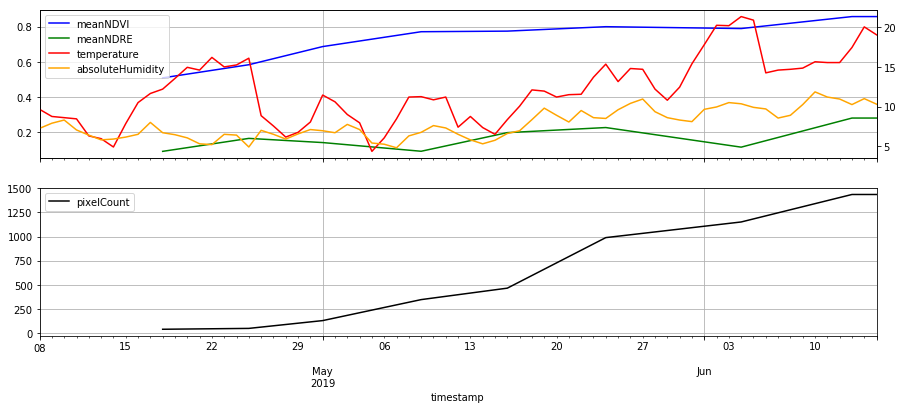

In [145]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.xlabel('meanNDVI vs. temperature')

ax1 = whole_df['meanNDVI'].plot(color='blue', grid=True, label='meanNDVI')
ax3 = whole_df['meanNDRE'].plot(color='green', grid=True, label='meanNDRE', sharey=ax1)

ax2 = whole_df['temperature'].plot(color='red', grid=True, secondary_y=True, label='temperature')
ax4 = whole_df['absoluteHumidity'].plot(color='orange', grid=True, secondary_y=True, label='absoluteHumidity', sharey=ax2)
#ax4 = whole_df['cloudCover'].plot(color='violet', grid=True, secondary_y=True, label='cloudCover', sharey=ax2)
#ax5 = whole_df['pixelCount'].plot(color='black', grid=True, secondary_y=False, label='pixelCount')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1+h2, l1+l2, loc=2)

plt.subplot(2,1,2)
ax5 = whole_df['pixelCount'].plot(color='black', grid=True, secondary_y=False, label='pixelCount')

h5, l5 = ax5.get_legend_handles_labels()

plt.legend(h5, l5, loc=2)

plt.show()

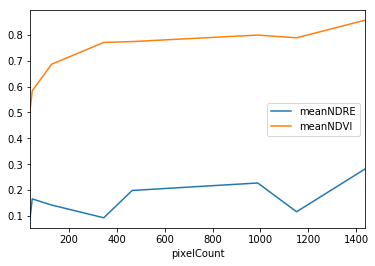

In [146]:
whole_df.plot(x='pixelCount', y=['meanNDRE','meanNDVI'])

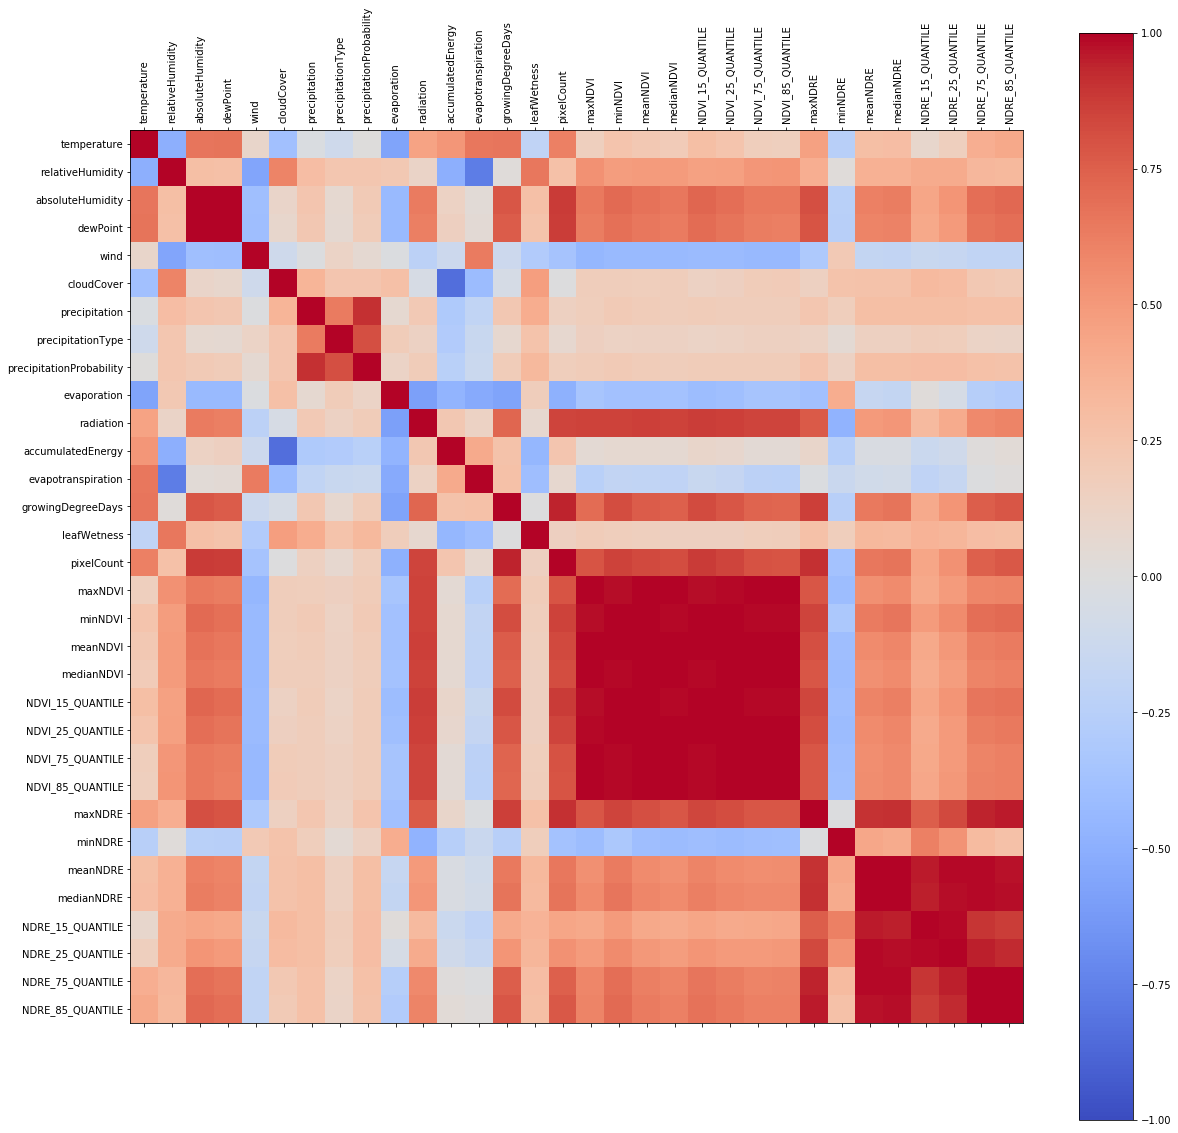

In [147]:
corr = whole_df.corr()
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111)
cax = ax.matshow(corr,cmap='coolwarm', vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,len(whole_df.columns),1)
ax.set_xticks(ticks)
plt.xticks(rotation=90)
ax.set_yticks(ticks)
ax.set_xticklabels(whole_df.columns)
ax.set_yticklabels(whole_df.columns)
plt.show()

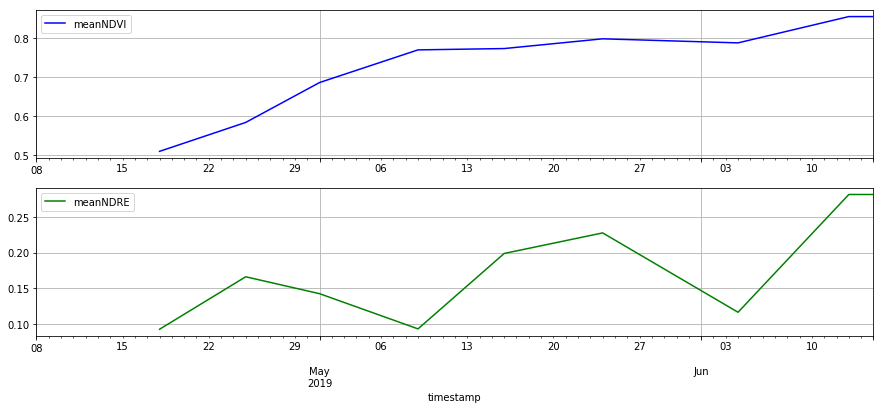

In [157]:
plt.figure(figsize=(15,6))
plt.subplot(2,1,1)
plt.xlabel('meanNDVI vs. temperature')

ax1 = whole_df['meanNDVI'].plot(color='blue', grid=True, label='meanNDVI')

#ax2 = whole_df['relativeHumidity'].plot(color='red', grid=True, secondary_y=True, label='relativeHumidity', sharey=ax2)
#ax4 = whole_df['absoluteHumidity'].plot(color='orange', grid=True, secondary_y=True, label='absoluteHumidity', sharey=ax2)
#ax5 = whole_df['dewPoint'].plot(color='green', grid=True, secondary_y=True, label='dewPoint', sharey=ax2)
#ax6 = whole_df['radiation'].plot(color='violet', grid=True, secondary_y=True, label='radiation', sharey=ax2)
#ax7 = whole_df['growingDegreeDays'].plot(color='black', grid=True, secondary_y=False, label='growingDegreeDays', sharey=ax2)

h1, l1 = ax1.get_legend_handles_labels()
#h2, l2 = ax2.get_legend_handles_labels()

plt.legend(h1, l1, loc=2)

plt.subplot(2,1,2)
ax3 = whole_df['meanNDRE'].plot(color='green', grid=True, label='meanNDRE')
#ax8 = whole_df['relativeHumidity'].plot(color='red', grid=True, secondary_y=True, label='relativeHumidity')
#ax9 = whole_df['absoluteHumidity'].plot(color='orange', grid=True, secondary_y=True, label='absoluteHumidity', sharey=ax8)
#ax10 = whole_df['dewPoint'].plot(color='green', grid=True, secondary_y=True, label='dewPoint', sharey=ax8)
#ax11 = whole_df['radiation'].plot(color='violet', grid=True, secondary_y=True, label='radiation', sharey=ax8)
#ax12 = whole_df['growingDegreeDays'].plot(color='black', grid=True, secondary_y=True, label='growingDegreeDays',sharey=ax8)

h5, l5 = ax3.get_legend_handles_labels()
#h6, l6 = ax8.get_legend_handles_labels()

plt.legend(h5, l5, loc=2)

plt.show()

In [152]:
corr

,temperature,relativeHumidity,absoluteHumidity,dewPoint,wind,cloudCover,precipitation,precipitationType,precipitationProbability,evaporation,...,NDVI_75_QUANTILE,NDVI_85_QUANTILE,maxNDRE,minNDRE,meanNDRE,medianNDRE,NDRE_15_QUANTILE,NDRE_25_QUANTILE,NDRE_75_QUANTILE,NDRE_85_QUANTILE
temperature,1.000000,-0.498132,0.659809,0.670869,0.099897,-0.381592,-0.024010,-0.105218,0.004621,-0.568190,...,0.171617,0.162489,0.455658,-0.248684,0.281305,0.292216,0.086528,0.163892,0.385779,0.418088
relativeHumidity,-0.498132,1.000000,0.287705,0.273749,-0.555043,0.597456,0.295086,0.231855,0.226928,0.211382,...,0.510935,0.520877,0.387907,0.023347,0.371689,0.371198,0.401635,0.400958,0.335059,0.321678
absoluteHumidity,0.659809,0.287705,1.000000,0.995079,-0.383498,0.106244,0.238356,0.067149,0.195865,-0.423558,...,0.648019,0.645174,0.811105,-0.235375,0.615334,0.627053,0.433878,0.516374,0.693923,0.716524
dewPoint,0.670869,0.273749,0.995079,1.000000,-0.393742,0.091287,0.219491,0.055551,0.183233,-0.423292,...,0.626646,0.624203,0.792089,-0.244033,0.594111,0.605136,0.415958,0.496322,0.671850,0.694396
wind,0.099897,-0.555043,-0.383498,-0.393742,1.000000,-0.105753,-0.013018,0.119843,0.060197,-0.019295,...,-0.431889,-0.435893,-0.305160,0.205449,-0.179169,-0.181224,-0.141028,-0.161962,-0.189048,-0.192728
cloudCover,-0.381592,0.597456,0.106244,0.091287,-0.105753,1.000000,0.346755,0.239023,0.235162,0.275169,...,0.185172,0.188672,0.146598,0.257417,0.260823,0.259388,0.319599,0.303662,0.215540,0.197971
precipitation,-0.024010,0.295086,0.238356,0.219491,-0.013018,0.346755,1.000000,0.637207,0.912728,0.067782,...,0.178359,0.178060,0.229507,0.166981,0.284103,0.284834,0.283615,0.288996,0.272533,0.266668
precipitationType,-0.105218,0.231855,0.067149,0.055551,0.119843,0.239023,0.637207,1.000000,0.810721,0.186086,...,0.141911,0.145641,0.128351,0.049295,0.147051,0.144297,0.178194,0.168803,0.122570,0.113688
precipitationProbability,0.004621,0.226928,0.195865,0.183233,0.060197,0.235162,0.912728,0.810721,1.000000,0.117797,...,0.181786,0.183504,0.246110,0.134216,0.286414,0.285016,0.294665,0.295481,0.270095,0.263014
evaporation,-0.568190,0.211382,-0.423558,-0.423292,-0.019295,0.275169,0.067782,0.186086,0.117797,1.000000,...,-0.350589,-0.345392,-0.380029,0.394182,-0.160927,-0.179368,0.020614,-0.060561,-0.258104,-0.288397
